<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/AnagraficheCSN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisi Anagrafiche CSN2

In [7]:
# 
# data source https://reportgodiva.dsi.infn.it/ per anagrafiche
# data source https://dbprogetti.dsi.infn.it/dbprogetti/listaProgettiFE per progetti su fondi esterni
# https://drive.google.com/file/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/
# 
def load_from_gspreadsheet(key, sheet_name):
    # google spredsheet TO url 
    # url = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv&sheet={Sheet2}"
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))
    print(url)
    return url
def sp2pd(key, sheet_name, verbose=False):
    # spreadsheet TO Panda
    import pandas as pd
    df = pd.read_csv(load_from_gspreadsheet(key, sheet_name))
    # df = df[df.File_Number.isnull() == False]
    df.fillna('', inplace=True)
    if verbose: print ('Variables: ', df.columns.values)
    return df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fast')
plt.rc('font', size = 14, family ='Sans-Serif')

In [24]:
INFN = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='INFN')
# sosrtuire con CSN* per vedere le altre CSN (attaulente c''e' solo la 1)
CSN2 = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='CSN2')
FE_CSN2 = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='FE_CSN2')
FE_INFN = sp2pd(key='1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh', sheet_name='FE_INFN')

https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=INFN&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=CSN2&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=FE_CSN2&headers=1
https://docs.google.com/spreadsheets/d/1pTju26izsWDAd90vn80qEyNbfnC5Q9Oh/gviz/tq?tqx=out:csv&sheet=FE_INFN&headers=1


In [25]:
CSN2

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
0,Acerbi,Fabio,36,M,(01/01/2020 - 31/12/2020) Associato Scientific...,30% - (TIFP:CSN2) DARKSIDE (Ricercatore),
1,Acernese,Fausto,45,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,20% - (NA:CSN2) ET_ITALIA (Ricercatore)\n 80%...,
2,Addazi,Andrea,31,M,(15/01/2020 - 31/12/2020) Associato Scientific...,40% - (ROMA2:CSN2) DAMA (Ricercatore),
3,Addesso,Paolo,45,M,(01/01/2020 - 31/12/2020) Associato Tecnologic...,20% - (SA:CSN2) VIRGO (Ricercatore),
4,Adriani,Oscar,55,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,70% - (FI:CSN2) HERD_DMP (Ricercatore),
...,...,...,...,...,...,...,...
1586,Zendri,Jean Pierre,57,M,(14/02/1997 - nessuna scad.) Dipendente Primo ...,40% - (PD:CSN2) ET_ITALIA (Ricercatore)\n 60%...,
1587,Zichichi,Antonino,90,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,0% - (BO:CSN2) AMS2 (Ricercatore)\n 0% - (BO:...,
1588,Zuccarello,Francesca,66,F,(01/01/2020 - 31/12/2020) Associato Scientific...,20% - (CT:CSN2) AUGER (Ricercatore)\n 30% - (...,
1589,Zucchelli,Stefano,66,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,30% - (BO:CSN2) CUORE (Ricercatore)\n 10% - (...,


Anagrafica

In [26]:
dipendenti   = pd.DataFrame(columns = CSN2.columns)
d_dottorandi = pd.DataFrame(columns = CSN2.columns) 
d_borsisti   = pd.DataFrame(columns = CSN2.columns) 
d_assegnisti = pd.DataFrame(columns = CSN2.columns) 
d_tecnici    = pd.DataFrame(columns = CSN2.columns) 
associati    = pd.DataFrame(columns = CSN2.columns) 
a_dottorandi = pd.DataFrame(columns = CSN2.columns) 
a_borsisti   = pd.DataFrame(columns = CSN2.columns) 
a_assegnisti = pd.DataFrame(columns = CSN2.columns) 
a_tecnici    = pd.DataFrame(columns = CSN2.columns) 
altro        = pd.DataFrame(columns = CSN2.columns)
for i, contratto in enumerate(CSN2.Contratti):
  if contratto == '' and not (contratto.find('Dipendente')>=0 or contratto.find('Associato')>=0):
    altro = altro.append(CSN2.iloc[i], ignore_index=True)
  if contratto.find('Dipendente')>=0:
    dipendenti = dipendenti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      d_dottorandi = d_dottorandi.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      d_borsisti = d_borsisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      d_assegnisti = d_assegnisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      d_tecnici = d_tecnici.append(CSN2.iloc[i], ignore_index=True)

  if contratto.find('Associato')>=0:
    associati = associati.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      a_dottorandi = a_dottorandi.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      a_borsisti = a_borsisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      a_assegnisti = a_assegnisti.append(CSN2.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      a_tecnici = a_tecnici.append(CSN2.iloc[i], ignore_index=True)

print ('Popolazione: ', len(CSN2),'\n',
       'Dipendenti: ', len(dipendenti), len(d_dottorandi), len(d_borsisti), len(d_assegnisti), len(d_tecnici), '\n',
       'Associati: ', len(associati), len(a_dottorandi), len(a_borsisti), len(a_assegnisti), len(a_tecnici), '\n',
       'altro: ', len(altro))

Popolazione:  1591 
 Dipendenti:  503 0 6 0 93 
 Associati:  877 127 7 59 39 
 altro:  211


In [27]:
dipendenti[dipendenti["Eta'"]>70]

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto


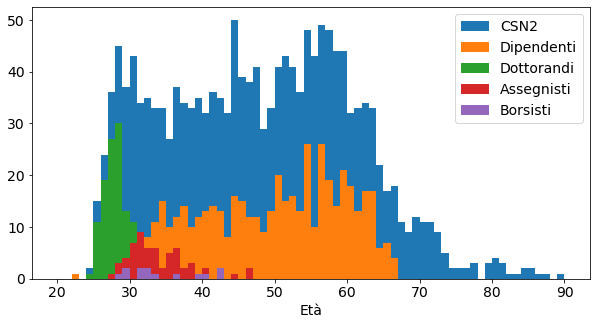

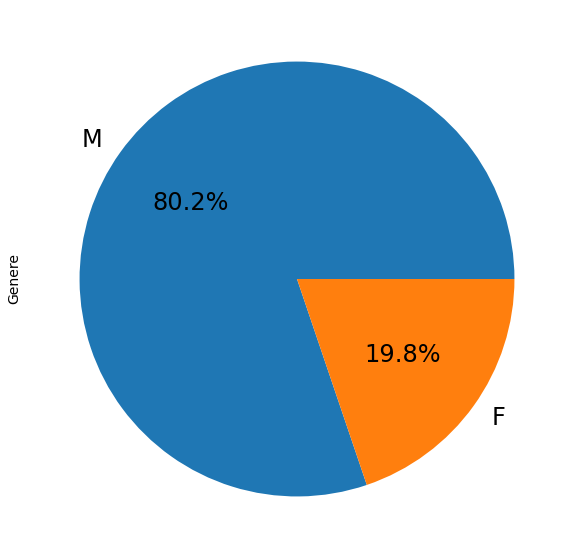

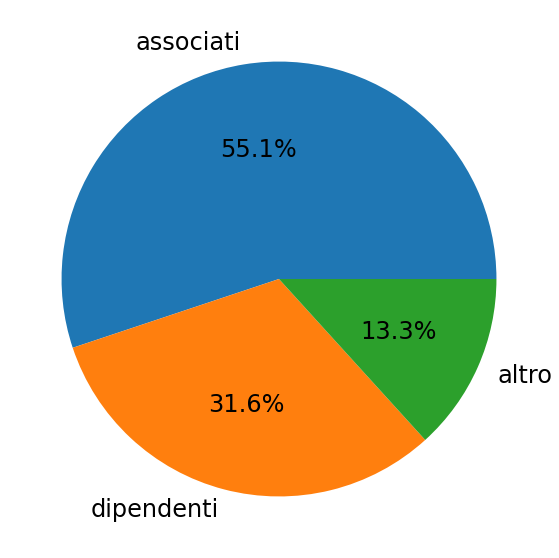

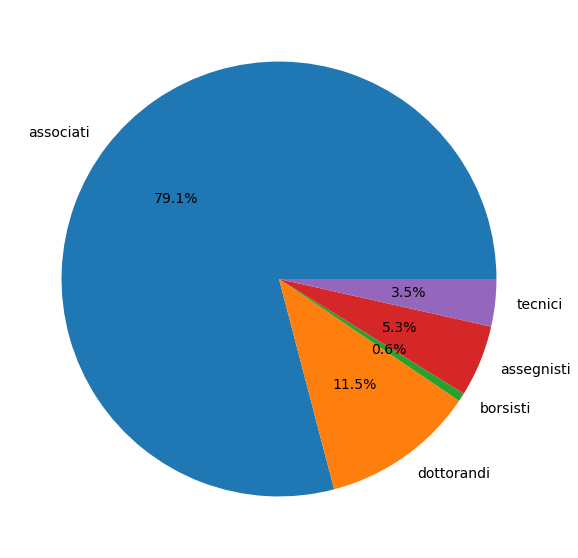

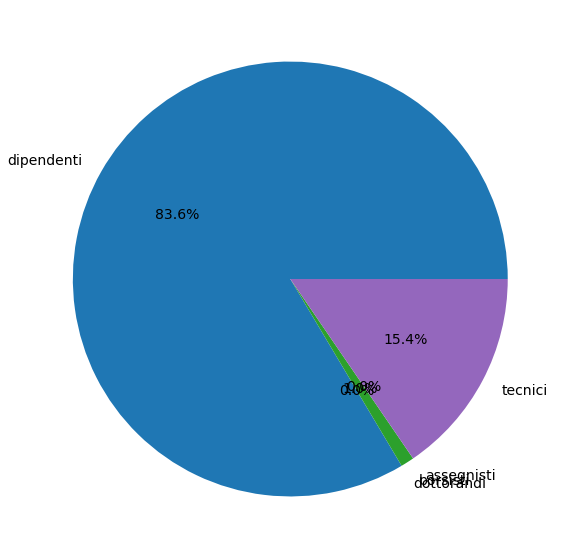

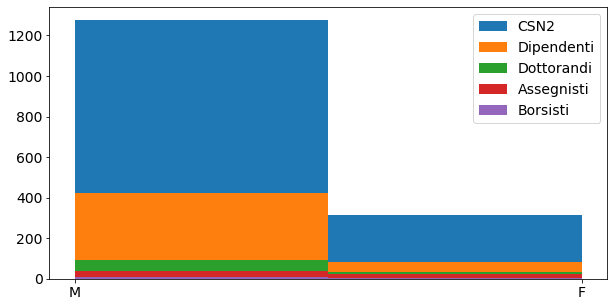

In [28]:
plt.figure(figsize = (10,5))
plt.hist(CSN2["Eta'"], label='CSN2', bins=70, range=(20,90))
plt.hist(dipendenti["Eta'"], label='Dipendenti', bins=70, range=(20,90))
plt.hist(a_dottorandi["Eta'"], label='Dottorandi', bins=70, range=(20,90))
plt.hist(np.concatenate((a_assegnisti["Eta'"], d_assegnisti["Eta'"])), label='Assegnisti', bins=70, range=(20,90))
plt.hist(np.concatenate((a_borsisti["Eta'"], d_borsisti["Eta'"])), label='Borsisti', bins=70, range=(20,90))
#plt.hist(np.concatenate((a_tecnici["Eta'"], d_tecnici["Eta'"])), label='Tecnici TD', bins=70, range=(20,90))

#plt.yscale('log')
plt.xlabel('Età')
plt.legend()
plt.show()
plt.figure(figsize = (10,10))
CSN2.Genere.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 24})
plt.show()
plt.figure(figsize = (10,10))
who = [len(associati), len(dipendenti), len(altro)]
who_labels = [ 'associati', 'dipendenti', 'altro']
plt.pie(who, labels = who_labels, autopct='%1.1f%%', textprops={'fontsize': 24})
plt.show()
plt.figure(figsize = (10,10))
who = [len(associati), len(a_dottorandi), len(a_borsisti), len(a_assegnisti), len(a_tecnici)]
who_labels = [ 'associati', 'dottorandi', 'borsisti', 'assegnisti', 'tecnici']
plt.pie(who, labels = who_labels, autopct='%1.1f%%', )
plt.show()
plt.figure(figsize = (10,10))

who = [len(dipendenti), len(d_dottorandi), len(d_borsisti), len(d_assegnisti), len(d_tecnici)]
who_labels = ['dipendenti','dottorandi', 'borsisti', 'assegnisti', 'tecnici']
plt.pie(who, labels = who_labels, autopct='%1.1f%%')
plt.show()

plt.figure(figsize = (10,5))
plt.hist(CSN2.Genere, label='CSN2', bins=2)
plt.hist(dipendenti.Genere, label='Dipendenti', bins=2)
plt.hist(a_dottorandi.Genere, label='Dottorandi', bins=2)
plt.hist(np.concatenate((a_assegnisti.Genere, d_assegnisti.Genere)), label='Assegnisti', bins=2)
plt.hist(np.concatenate((a_borsisti.Genere, d_borsisti.Genere)), label='Borsisti', bins=2)
#plt.yscale('log')
plt.legend()
plt.show()

In [29]:
I_dipendenti   = pd.DataFrame(columns = INFN.columns)
I_d_dottorandi = pd.DataFrame(columns = INFN.columns) 
I_d_borsisti   = pd.DataFrame(columns = INFN.columns) 
I_d_assegnisti = pd.DataFrame(columns = INFN.columns) 
I_d_tecnici    = pd.DataFrame(columns = INFN.columns) 
I_associati    = pd.DataFrame(columns = INFN.columns) 
I_a_dottorandi = pd.DataFrame(columns = INFN.columns) 
I_a_borsisti   = pd.DataFrame(columns = INFN.columns) 
I_a_assegnisti = pd.DataFrame(columns = INFN.columns) 
I_a_tecnici    = pd.DataFrame(columns = INFN.columns) 
I_altro        = pd.DataFrame(columns = INFN.columns)
for i, contratto in enumerate(INFN.Contratti):
  if contratto == '' and not (contratto.find('Dipendente')>=0 or contratto.find('Associato')>=0):
    I_altro = I_altro.append(INFN.iloc[i], ignore_index=True)
  if contratto.find('Dipendente')>=0:
    I_dipendenti = I_dipendenti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      I_d_dottorandi = I_d_dottorandi.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      I_d_borsisti = I_d_borsisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      I_d_assegnisti = I_d_assegnisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      I_d_tecnici = I_d_tecnici.append(INFN.iloc[i], ignore_index=True)

  if contratto.find('Associato')>=0:
    I_associati = I_associati.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Dottorando')>=0:
      I_a_dottorandi = I_a_dottorandi.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Borsista')>=0:
      I_a_borsisti = I_a_borsisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Assegnista')>=0:
      I_a_assegnisti = I_a_assegnisti.append(INFN.iloc[i], ignore_index=True)
    if contratto.find('Tecnico')>=0:
      I_a_tecnici = I_a_tecnici.append(INFN.iloc[i], ignore_index=True)

print ('Popolazione: ', len(INFN),'\n',
       'I_dipendenti: ', len(I_dipendenti), len(I_d_dottorandi), len(I_d_borsisti), len(I_d_assegnisti), len(I_d_tecnici), '\n',
       'I_associati: ', len(I_associati), len(I_a_dottorandi), len(I_a_borsisti), len(I_a_assegnisti), len(I_a_tecnici), '\n',
       'I_Altro: ', len(I_altro))

Popolazione:  5394 
 I_dipendenti:  1572 2 56 0 248 
 I_associati:  3039 625 25 231 118 
 I_Altro:  785


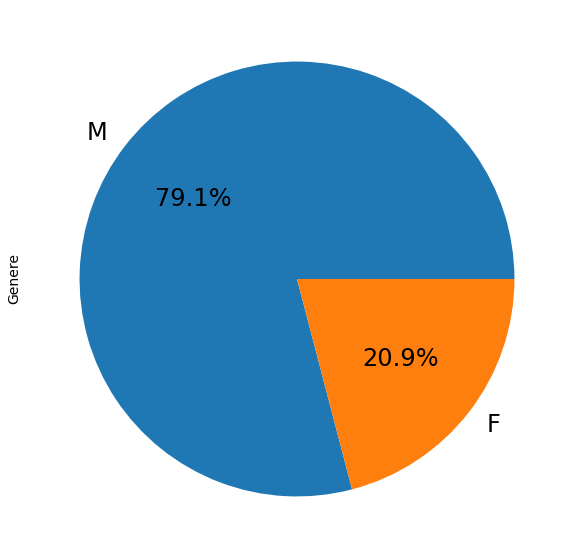

In [ ]:
# plt.figure(figsize = (10,5))
# plt.hist(INFN["Eta'"], label='INFN', bins=70, range=(20,90))
# plt.hist(I_dipendenti["Eta'"], label='I_dipendenti', bins=70, range=(20,90))
# plt.hist(I_a_dottorandi["Eta'"], label='Dottorandi', bins=70, range=(20,90))
# plt.hist(np.concatenate((I_a_assegnisti["Eta'"], I_d_assegnisti["Eta'"])), label='Assegnisti', bins=70, range=(20,90))
# plt.hist(np.concatenate((I_a_borsisti["Eta'"], I_d_borsisti["Eta'"])), label='Borsisti', bins=70, range=(20,90))
# #plt.hist(np.concatenate((I_a_tecnici["Eta'"], I_d_tecnici["Eta'"])), label='Tecnici TD', bins=70, range=(20,90))

# #plt.yscale('log')
# plt.xlabel('Età')
# plt.legend()
# plt.show()
plt.figure(figsize = (10,10))
INFN.Genere.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 24})
plt.show()

Fondi Esterni, progetti e persone

In [ ]:
import time
fe_attivi = pd.DataFrame(columns = FE_INFN.columns)
for i, fe_end in enumerate(FE_INFN['End Date']):
  if time.strptime(fe_end, "%d-%m-%Y") > time.strptime('31-12-2020', "%d-%m-%Y"):
    fe_attivi = fe_attivi.append(FE_INFN.iloc[i], ignore_index=True)



In [ ]:
fe_attivi[fe_attivi['Research line']==7]

,Project,Research line,Start Date,End Date,Extension Date,INFN Grant,Project Grant,Overall Budget
45,CAGLIARI_2020,7,01-01-2018,01-01-2030,,,,
52,CNRBIOMICS_PON,7,14-06-2019,30-06-2021,,,,
74,EOSC_HUB,7,01-01-2018,31-12-2021,,,,
75,EOSC_PILLAR,7,01-07-2019,30-06-2022,,,,
82,ESCAPE,7,01-02-2019,31-07-2022,,,,
94,EXSCALATE4COV,7,01-04-2020,30-09-2021,,,,
120,HARMONY,7,01-10-2017,31-12-2021,,,,
121,HARMONY_PLUS,7,01-10-2020,30-09-2023,,,,
150,IOTWINS,7,01-09-2019,31-08-2022,,,,
166,LIFEWATCH_PON,7,14-06-2019,31-12-2021,,,,


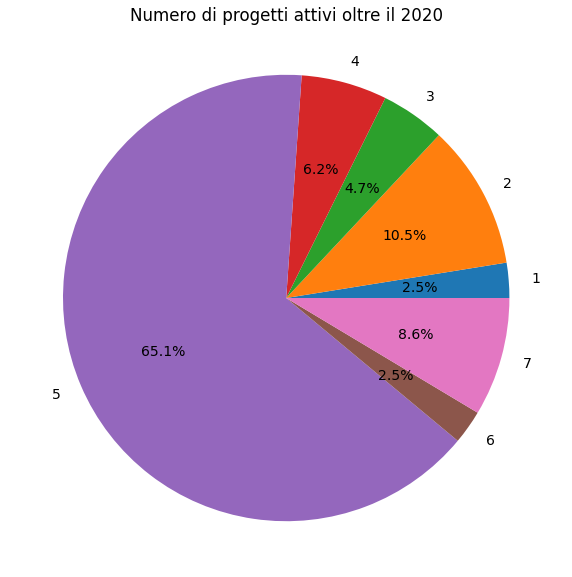

In [ ]:
plt.figure(figsize = (10,10))
sums = fe_attivi['Research line'].groupby(fe_attivi['Research line']).sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index,  autopct='%1.1f%%');
plt.title("Numero di progetti attivi oltre il 2020")
plt.show()

In [ ]:
# cerca tutte le persone in vari progetti
CSN2[CSN2["Esperimenti"].str.contains("INITUM|CYGNO")]

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
81,Baracchini,Elisabetta,38,F,(01/01/2020 - 31/12/2020) Associato Incarico d...,20% - (LNGS:CSN2) CYGNO (Ricercatore)\n 0% - ...,
107,Bedogni,Roberto,46,M,(07/01/2014 - nessuna scad.) Dipendente Ricerc...,5% - (LNF:CSN2) CYGNO (Ricercatore),
124,Benussi,Luigi,53,M,(01/02/2010 - nessuna scad.) Dipendente Ricerc...,20% - (LNF:CSN2) CYGNO (Ricercatore),
150,Bianco,Stefano,59,M,(01/03/1992 - nessuna scad.) Dipendente Primo ...,20% - (LNF:CSN2) CYGNO (Ricercatore),
251,Capoccia,Cesidio,56,M,(01/07/1994 - nessuna scad.) Dipendente Collab...,30% - (LNF:CSN2) CYGNO (Tecnico),
254,Caponero,Michele Arturo,59,M,(01/01/2020 - 31/12/2020) Associato Scientific...,20% - (LNF:CSN2) CYGNO (Ricercatore),
309,Cavoto,Gianluca,47,M,(19/03/2020 - 31/12/2020) Associato Incarico d...,30% - (ROMA1:CSN2) CYGNO (Ricercatore)\n 0% -...,
423,D'Imperio,Giulia,32,F,(02/09/2019 - nessuna scad.) Dipendente Ricerc...,50% - (ROMA1:CSN2) CYGNO (Ricercatore)\n 50% ...,
515,Di Marco,Emanuele,41,M,(01/04/2015 - nessuna scad.) Dipendente Ricerc...,10% - (ROMA1:CSN2) CYGNO (Ricercatore)\n 10% ...,
743,Iacoangeli,Francesco,43,M,(01/10/2018 - nessuna scad.) Dipendente Tecnol...,30% - (ROMA1:CSN2) CYGNO (Tecnologo),


In [ ]:
# progetti attivi in CSN2
np.array(fe_attivi[fe_attivi['Research line']==2].Project)

array(['2015L33WAK_002', 'ADAM', 'AHEAD2020', 'AMS_02_19', 'AMS_E2_035',
       'ARIA', 'ASDC_C_011', 'ASDC_C_037', 'ASI_AMS', 'ASI_I_APS',
       'ASI_INAF_EG', 'ASI_INAF_FLUCHE', 'ASPERA_2_235489', 'AUGERNEXT',
       'BOREXINO_CF', 'BOREXINO_CF_PFE', 'COSMOTRIG', 'DARWIN', 'ENUBET',
       'ESONET_TEST_EXP', 'ESSNUSB', 'EUCLID_FASE_D', 'EXTP',
       'FARO2030_PON', 'GAMMARAD', 'GAPS_ASI', 'GERDA_CF', 'HOLMES',
       'HOLMES_340321', 'ILIAS', 'INFN_RT2', 'INGV_PORTO', 'INITIUM',
       'IPANEMA_PON', 'ISOTTA', 'IXPE', 'KM3NET-ITALIA', 'KM3NET_PP',
       'LIMADOU', 'LIMADOU_2', 'LIMADOU_FASE_E', 'LIMADOU_SCIENZA',
       'MAECI_GW', 'MAECIJUNO_05390', 'MEGANTE', 'NUTECH', 'OPERA_CF',
       'PACK_PON', 'PAMELA_E', 'PAMELA_SIEGEN', 'PAN', 'POX',
       'PRIN10_GEMME', 'PRIN_201744NR8S', 'PRIN_20179F8XWS',
       'PRIN_2017FJZMCJ', 'PRIN_2017KC8WMB', 'PRIN_2017SYRTCN',
       'PRIN_2017T54J9J', 'QUBIC_FE', 'SUPERGALAX', 'TENMA', 'VIRGO_MIUR',
       'VST_INAF_GR_2'], dtype=object)

In [ ]:
CSN2[CSN2.Esperimenti.str.contains('LIMADOU')]

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
58,Assante,Dario,41,M,,60% - (LNF:CSN2) LIMADOU_CSN2 (Ricercatore)\n ...,
66,Badoni,Davide,60,M,(02/05/1985 - nessuna scad.) Dipendente Tecnol...,50% - (ROMA2:CSN2) LIMADOU_CSN2 (Tecnologo),
90,Bartocci,Simona,39,F,(04/06/2020 - 03/06/2021) Dipendente Collabora...,100% - (ROMA2:CSN2) LIMADOU_CSN2 (Ricercatore),LIMADOU 2 (04-06-2020 / 03-06-2021)
103,Battiston,Roberto,64,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,40% - (TIFP:CSN2) AMS2 (Ricercatore)\n 30% - ...,
123,Benotto,Franco,51,M,(16/11/1988 - nessuna scad.) Dipendente Collab...,44% - (TO:CSN2) LIMADOU_CSN2 (Tecnico),
...,...,...,...,...,...,...,...
1423,Sparvoli,Roberta,50,F,(01/01/2020 - 31/12/2020) Associato Incarico d...,30% - (ROMA2:CSN2) GAPS (Ricercatore)\n 60% -...,
1424,Spataro,Bruno,73,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,0% - (LNF:CSN2) LIMADOU_CSN2 (Ricercatore),
1495,Tosi,Paolo,64,M,(01/01/2020 - 31/12/2020) Associato Scientific...,30% - (TIFP:CSN2) LIMADOU_CSN2 (Ricercatore),
1561,Vitale,Vincenzo,46,M,(01/10/2018 - nessuna scad.) Dipendente Ricerc...,5% - (ROMA2:CSN2) AHEAD2020 (Ricercatore)\n 7...,


In [ ]:
# cerca tutte le persone con progetti attivi in CSN2 e crea il DB
fe_people = pd.DataFrame(columns=CSN2.columns)
for i, progetto in enumerate(fe_attivi[fe_attivi['Research line']==2].Project):
    fe_people = fe_people.append(CSN2[CSN2.Esperimenti.str.contains(progetto)])
fe_people.tail(30)

,Cognome,Nome,Eta',Genere,Contratti,Esperimenti,Finanziamenti Contratto
795,Latronico,Luca,46,M,(03/02/2011 - nessuna scad.) Dipendente Primo ...,45% - (TO:CSN2) FERMI (Ricercatore)\n 40% - (...,
844,Lubrano,Pasquale,61,M,(01/12/1991 - nessuna scad.) Dipendente Dirige...,10% - (PG:CSN2) ET_ITALIA (Ricercatore)\n 40%...,
962,Mereu,Isabella,34,F,(01/05/2019 - 30/04/2021) Dipendente Assegno d...,50% - (PG:CSN2) CTA (Ricercatore)\n 40% - (PG...,MAECI_GW (01-05-2019 / 30-06-2019)FOE (01-07-2...
1169,Pesce-Rollins,Melissa,41,F,(01/10/2018 - nessuna scad.) Dipendente Ricerc...,25% - (PI:CSN2) FERMI (Ricercatore)\n 50% - (...,
109,Bellato,Marco Angelo,57,M,(01/11/1993 - nessuna scad.) Dipendente Primo ...,20% - (PD:CSN2) MAECIJUNO_05390 (Tecnologo),
209,Brugnera,Riccardo,61,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,70% - (PD:CSN2) GERDA (Ricercatore)\n 25% - (...,
431,Dal Corso,Flavio,64,M,(01/06/1992 - nessuna scad.) Dipendente Primo ...,30% - (PD:CSN2) ENUBET_2 (Tecnologo)\n 20% - ...,
655,Garfagnini,Alberto,51,M,(01/01/2020 - 31/12/2020) Associato Incarico d...,30% - (PD:CSN2) GERDA (Ricercatore)\n 50% - (...,
709,Grassi,Marco,34,M,(01/01/2020 - 31/12/2020) Associato Scientific...,90% - (PD:CSN2) JUNO (Ricercatore)\n 10% - (P...,
822,Lippi,Ivano,61,M,(01/12/1989 - nessuna scad.) Dipendente Ricerc...,60% - (PD:CSN2) GERDA (Ricercatore)\n 10% - (...,


In [ ]:
np.array(fe_people.fe_progetto)

array(['AHEAD2020', 'AHEAD2020', 'AHEAD2020', 'AHEAD2020', 'AHEAD2020',
       'AHEAD2020', 'LIMADOU', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ENUBET', 'ENUBET', 'MAECIJUNO_05390', 'ENUBET', 'ENUBET',
       'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'LIMADOU', 'ENUBET',
       'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ESSNUSB', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ENUBET', 'ESSNUSB', 'ENUBET', 'ENUBET', 'ESSNUSB', 'ESSNUSB',
       'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES',
       'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES',
       'INFN_RT2', 'INITIUM', 'INITIUM', 'INITIUM', 'INITIUM', 'INITIUM',
       'INITIUM', 'INITIUM', 'INITIUM', 'INITIUM', 'IXPE', 'IXPE', 'IXPE',
       'IXPE', 'IXPE', 'LIMADOU', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE',
       'MAECI_GW', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE',
       'IXPE', 'IXP

In [ ]:
# ipotizando un progetto esterno per persona agginge le colonne nome del progetto e percentuale sul FE
fe_attivita = np.empty((len(fe_people)), dtype=object)
fe_pp =  np.empty((len(fe_people)), dtype=object)
for i, esperimenti in enumerate(fe_people.Esperimenti):
  for j, fe_progetto in enumerate(fe_attivi[fe_attivi['Research line']==2].Project):
    if esperimenti.find(fe_progetto)>=0:
      esp_arr = esperimenti.split('\n')   
      for k in range(len(esp_arr)):
        if esp_arr[k].find(fe_progetto)>=0:
          fe_pp[i] = np.int(esp_arr[k].split('%')[0])
          fe_attivita[i] = fe_progetto
fe_people['fe_progetto'] = fe_attivita
fe_people['fe_perc'] = fe_pp

Tottle FTE su FE:  72.33


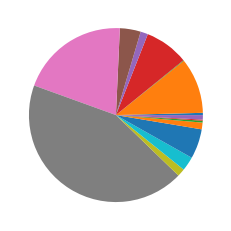

In [ ]:
print ('Tottle FTE su FE: ', fe_people.fe_perc.sum()/100)
fe_density = fe_people['fe_perc'].groupby(fe_people['fe_progetto']).sum()/100
plt.pie(fe_density)
plt.show()

In [ ]:
fe_density

fe_progetto
AHEAD2020           0.30
ENUBET              7.47
ESSNUSB             0.08
HOLMES              5.91
INFN_RT2            1.00
INITIUM             2.80
IXPE               14.61
LIMADOU            31.31
MAECIJUNO_05390     1.05
MAECI_GW            1.90
MEGANTE             4.00
PAN                 0.90
PRIN_20179F8XWS     0.25
PRIN_2017KC8WMB     0.15
SUPERGALAX          0.60
Name: fe_perc, dtype: float64

In [ ]:
np.array(fe_people.fe_progetto)

array(['AHEAD2020', 'AHEAD2020', 'AHEAD2020', 'AHEAD2020', 'AHEAD2020',
       'AHEAD2020', 'LIMADOU', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ENUBET', 'ENUBET', 'MAECIJUNO_05390', 'ENUBET', 'ENUBET',
       'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'LIMADOU', 'ENUBET',
       'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ESSNUSB', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET', 'ENUBET',
       'ENUBET', 'ESSNUSB', 'ENUBET', 'ENUBET', 'ESSNUSB', 'ESSNUSB',
       'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES',
       'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES', 'HOLMES',
       'INFN_RT2', 'INITIUM', 'INITIUM', 'INITIUM', 'INITIUM', 'INITIUM',
       'INITIUM', 'INITIUM', 'INITIUM', 'INITIUM', 'IXPE', 'IXPE', 'IXPE',
       'IXPE', 'IXPE', 'LIMADOU', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE',
       'MAECI_GW', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE', 'IXPE',
       'IXPE', 'IXP